In [ ]:
### first lets convert csv file into a GeoJSON file.

In [9]:
!pip install geopandas pandas shapely


In [11]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads

# Loading the CSV file
csv_file = "Texas_StratMap_County_poly_20250212.csv"
df = pd.read_csv(csv_file)

# Converting WKT geometry to Shapely objects
df['geometry'] = df['the_geom'].apply(lambda x: loads(x) if pd.notnull(x) else None)

# Droping rows with invalid geometries
df = df.dropna(subset=['geometry'])

# Converting DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Saveing as GeoJSON
geojson_file = "Texas_StratMap_County_poly.geojson"
gdf.to_file(geojson_file, driver="GeoJSON")

print(f"GeoJSON file saved as {geojson_file}")


GeoJSON file saved as Texas_StratMap_County_poly.geojson


In [14]:
import geopandas as gpd

file_name = 'Texas_StratMap_County_poly.geojson'
gdf = gpd.read_file(file_name)

print(len(gdf))
gdf.head(10)

254


,the_geom,SOURCE,STRATMAP_I,LOCAL_ID,NAME,FIPS_CODE,TXDOT_ABBR,COG_ABBR,DATE_CREAT,DATE_MODIF,DATE_RETIR,SHAPE_Leng,SHAPE_Area,geometry
0,MULTIPOLYGON (((-102.5396299999994 36.05514000...,DRG,None,113,Dallam,111,4,113,01/01/1964 08:00:00 AM +0000,None,None,2.647739,0.391036,"MULTIPOLYGON (((-102.53963 36.05514, -102.5834..."
1,MULTIPOLYGON (((-101.62343999999949 36.0553899...,DRG,None,113,Sherman,421,4,113,01/01/1963 08:00:00 AM +0000,None,None,1.968011,0.239757,"MULTIPOLYGON (((-101.62344 36.05539, -101.6341..."
2,MULTIPOLYGON (((-101.08517000000039 36.4998599...,DRG,None,113,Hansford,195,4,113,01/01/1973 08:00:00 AM +0000,None,None,1.965535,0.239188,"MULTIPOLYGON (((-101.08517 36.49986, -101.0851..."
3,MULTIPOLYGON (((-100.54607000000041 36.4595700...,DRG,None,113,Ochiltree,357,4,113,01/01/1972 08:00:00 AM +0000,None,None,1.967331,0.238828,"MULTIPOLYGON (((-100.54607 36.45957, -100.5461..."
4,MULTIPOLYGON (((-100.54019999999956 36.0559900...,DRG,None,113,Lipscomb,295,4,113,01/01/1972 08:00:00 AM +0000,None,None,1.979816,0.242397,"MULTIPOLYGON (((-100.54020 36.05599, -100.5462..."
5,MULTIPOLYGON (((-94.74615000000094 33.70300999...,DRG,None,119,Red River,387,1,119,01/01/1951 08:00:00 AM +0000,None,None,3.527775,0.266173,"MULTIPOLYGON (((-94.74615 33.70301, -94.74614 ..."
6,MULTIPOLYGON (((-97.48407000000053 33.91522000...,DRG,None,121,Montague,337,3,121,01/01/1968 08:00:00 AM +0000,None,None,2.090197,0.235631,"MULTIPOLYGON (((-97.48407 33.91522, -97.48409 ..."
7,MULTIPOLYGON (((-95.31061000000055 33.87967000...,DRG,None,119,Lamar,277,1,119,01/01/1951 08:00:00 AM +0000,None,None,2.716445,0.235193,"MULTIPOLYGON (((-95.31061 33.87967, -95.31057 ..."
8,MULTIPOLYGON (((-102.16287999999996 36.0547900...,DRG,None,113,Hartley,205,4,113,01/01/1963 08:00:00 AM +0000,None,None,2.617214,0.377983,"MULTIPOLYGON (((-102.16288 36.05479, -102.1629..."
9,MULTIPOLYGON (((-101.62343999999949 36.0553899...,DRG,None,113,Moore,341,4,113,01/01/1953 08:00:00 AM +0000,None,None,1.949866,0.234983,"MULTIPOLYGON (((-101.62344 36.05539, -101.6233..."


In [15]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

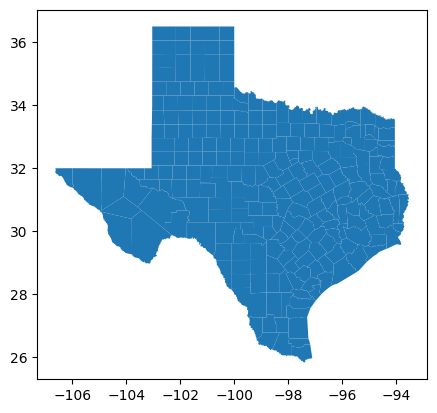

In [16]:
gdf.plot()

<AxesSubplot: >

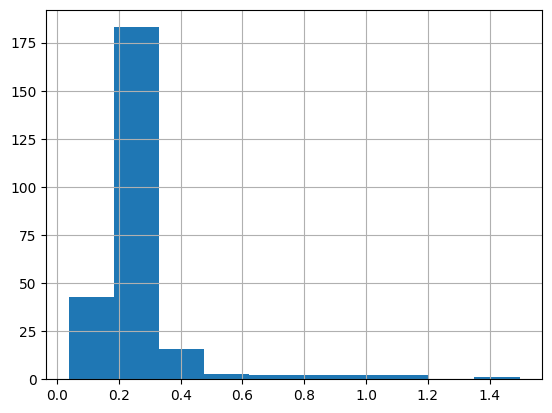

In [18]:
gdf.SHAPE_Area.hist()

In [21]:
gdf.SHAPE_Area.to_list()[0]

0.391036107

In [22]:
#lets see the shape area  type
print(type(gdf.SHAPE_Area.to_list()[0]))

<class 'float'>


Text(0.5, 1.0, 'Texas Neighborhood Length')

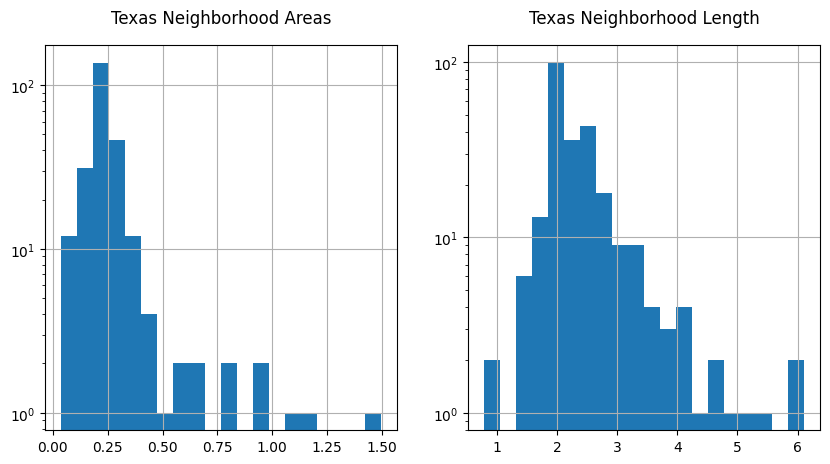

In [30]:
import matplotlib.pyplot as plt

f, ax= plt.subplots(1,2,figsize=(10,5))

gdf.SHAPE_Area.hist(ax=ax[0], bins = 20)
gdf.SHAPE_Leng.hist(ax=ax[1], bins = 20)

ax[0].set_yscale('log')
ax[1].set_yscale('log')


ax[0].set_title('Texas Neighborhood Areas', fontsize = 12, pad =16)
ax[1].set_title('Texas Neighborhood Length', fontsize = 12, pad =16)
